In [24]:
# Exploratory Data Analysis

In [27]:
#Data - https://github.com/LuisM78/Appliances-energy-prediction-data
#Importing Libraries

In [1]:
import pandas as pd
import datetime
import calendar
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns

In [3]:
data=pd.read_csv("../Part_2/energydata_complete.csv")

In [5]:
data.shape

(19735, 29)

In [6]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


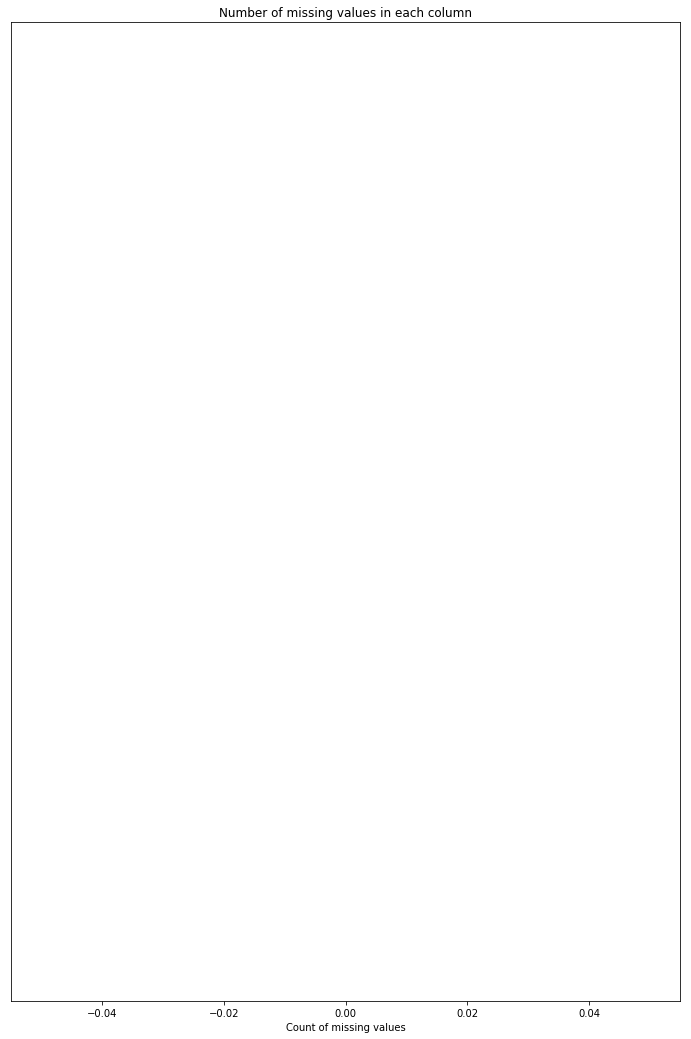

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [11]:
missing_df = data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

data.isnull().sum()

In [8]:
#So, there are no missing values in data

In [9]:
data.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

In [12]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [23]:
# We need to change date data type to date time from Object
data['date'] = pd.to_datetime(data['date'])

In [22]:
data.dtypes

date           datetime64[ns]
Appliances              int64
lights                  int64
T1                    float64
RH_1                  float64
T2                    float64
RH_2                  float64
T3                    float64
RH_3                  float64
T4                    float64
RH_4                  float64
T5                    float64
RH_5                  float64
T6                    float64
RH_6                  float64
T7                    float64
RH_7                  float64
T8                    float64
RH_8                  float64
T9                    float64
RH_9                  float64
T_out                 float64
Press_mm_hg           float64
RH_out                float64
Windspeed             float64
Visibility            float64
Tdewpoint             float64
rv1                   float64
rv2                   float64
dtype: object

In [32]:
data.date

0       2016-01-11 17:00:00
1       2016-01-11 17:10:00
2       2016-01-11 17:20:00
3       2016-01-11 17:30:00
4       2016-01-11 17:40:00
5       2016-01-11 17:50:00
6       2016-01-11 18:00:00
7       2016-01-11 18:10:00
8       2016-01-11 18:20:00
9       2016-01-11 18:30:00
10      2016-01-11 18:40:00
11      2016-01-11 18:50:00
12      2016-01-11 19:00:00
13      2016-01-11 19:10:00
14      2016-01-11 19:20:00
15      2016-01-11 19:30:00
16      2016-01-11 19:40:00
17      2016-01-11 19:50:00
18      2016-01-11 20:00:00
19      2016-01-11 20:10:00
20      2016-01-11 20:20:00
21      2016-01-11 20:30:00
22      2016-01-11 20:40:00
23      2016-01-11 20:50:00
24      2016-01-11 21:00:00
25      2016-01-11 21:10:00
26      2016-01-11 21:20:00
27      2016-01-11 21:30:00
28      2016-01-11 21:40:00
29      2016-01-11 21:50:00
                ...        
19705   2016-05-27 13:10:00
19706   2016-05-27 13:20:00
19707   2016-05-27 13:30:00
19708   2016-05-27 13:40:00
19709   2016-05-27 1

In [33]:
 sLength = len(data['date'])

In [34]:
print(sLength)

19735


In [35]:
for da in data.date:
    print(da)

2016-01-11 17:00:00
2016-01-11 17:10:00
2016-01-11 17:20:00
2016-01-11 17:30:00
2016-01-11 17:40:00
2016-01-11 17:50:00
2016-01-11 18:00:00
2016-01-11 18:10:00
2016-01-11 18:20:00
2016-01-11 18:30:00
2016-01-11 18:40:00
2016-01-11 18:50:00
2016-01-11 19:00:00
2016-01-11 19:10:00
2016-01-11 19:20:00
2016-01-11 19:30:00
2016-01-11 19:40:00
2016-01-11 19:50:00
2016-01-11 20:00:00
2016-01-11 20:10:00
2016-01-11 20:20:00
2016-01-11 20:30:00
2016-01-11 20:40:00
2016-01-11 20:50:00
2016-01-11 21:00:00
2016-01-11 21:10:00
2016-01-11 21:20:00
2016-01-11 21:30:00
2016-01-11 21:40:00
2016-01-11 21:50:00
2016-01-11 22:00:00
2016-01-11 22:10:00
2016-01-11 22:20:00
2016-01-11 22:30:00
2016-01-11 22:40:00
2016-01-11 22:50:00
2016-01-11 23:00:00
2016-01-11 23:10:00
2016-01-11 23:20:00
2016-01-11 23:30:00
2016-01-11 23:40:00
2016-01-11 23:50:00
2016-01-12 00:00:00
2016-01-12 00:10:00
2016-01-12 00:20:00
2016-01-12 00:30:00
2016-01-12 00:40:00
2016-01-12 00:50:00
2016-01-12 01:00:00
2016-01-12 01:10:00


2016-01-16 19:00:00
2016-01-16 19:10:00
2016-01-16 19:20:00
2016-01-16 19:30:00
2016-01-16 19:40:00
2016-01-16 19:50:00
2016-01-16 20:00:00
2016-01-16 20:10:00
2016-01-16 20:20:00
2016-01-16 20:30:00
2016-01-16 20:40:00
2016-01-16 20:50:00
2016-01-16 21:00:00
2016-01-16 21:10:00
2016-01-16 21:20:00
2016-01-16 21:30:00
2016-01-16 21:40:00
2016-01-16 21:50:00
2016-01-16 22:00:00
2016-01-16 22:10:00
2016-01-16 22:20:00
2016-01-16 22:30:00
2016-01-16 22:40:00
2016-01-16 22:50:00
2016-01-16 23:00:00
2016-01-16 23:10:00
2016-01-16 23:20:00
2016-01-16 23:30:00
2016-01-16 23:40:00
2016-01-16 23:50:00
2016-01-17 00:00:00
2016-01-17 00:10:00
2016-01-17 00:20:00
2016-01-17 00:30:00
2016-01-17 00:40:00
2016-01-17 00:50:00
2016-01-17 01:00:00
2016-01-17 01:10:00
2016-01-17 01:20:00
2016-01-17 01:30:00
2016-01-17 01:40:00
2016-01-17 01:50:00
2016-01-17 02:00:00
2016-01-17 02:10:00
2016-01-17 02:20:00
2016-01-17 02:30:00
2016-01-17 02:40:00
2016-01-17 02:50:00
2016-01-17 03:00:00
2016-01-17 03:10:00


2016-01-20 06:10:00
2016-01-20 06:20:00
2016-01-20 06:30:00
2016-01-20 06:40:00
2016-01-20 06:50:00
2016-01-20 07:00:00
2016-01-20 07:10:00
2016-01-20 07:20:00
2016-01-20 07:30:00
2016-01-20 07:40:00
2016-01-20 07:50:00
2016-01-20 08:00:00
2016-01-20 08:10:00
2016-01-20 08:20:00
2016-01-20 08:30:00
2016-01-20 08:40:00
2016-01-20 08:50:00
2016-01-20 09:00:00
2016-01-20 09:10:00
2016-01-20 09:20:00
2016-01-20 09:30:00
2016-01-20 09:40:00
2016-01-20 09:50:00
2016-01-20 10:00:00
2016-01-20 10:10:00
2016-01-20 10:20:00
2016-01-20 10:30:00
2016-01-20 10:40:00
2016-01-20 10:50:00
2016-01-20 11:00:00
2016-01-20 11:10:00
2016-01-20 11:20:00
2016-01-20 11:30:00
2016-01-20 11:40:00
2016-01-20 11:50:00
2016-01-20 12:00:00
2016-01-20 12:10:00
2016-01-20 12:20:00
2016-01-20 12:30:00
2016-01-20 12:40:00
2016-01-20 12:50:00
2016-01-20 13:00:00
2016-01-20 13:10:00
2016-01-20 13:20:00
2016-01-20 13:30:00
2016-01-20 13:40:00
2016-01-20 13:50:00
2016-01-20 14:00:00
2016-01-20 14:10:00
2016-01-20 14:20:00


2016-01-23 17:30:00
2016-01-23 17:40:00
2016-01-23 17:50:00
2016-01-23 18:00:00
2016-01-23 18:10:00
2016-01-23 18:20:00
2016-01-23 18:30:00
2016-01-23 18:40:00
2016-01-23 18:50:00
2016-01-23 19:00:00
2016-01-23 19:10:00
2016-01-23 19:20:00
2016-01-23 19:30:00
2016-01-23 19:40:00
2016-01-23 19:50:00
2016-01-23 20:00:00
2016-01-23 20:10:00
2016-01-23 20:20:00
2016-01-23 20:30:00
2016-01-23 20:40:00
2016-01-23 20:50:00
2016-01-23 21:00:00
2016-01-23 21:10:00
2016-01-23 21:20:00
2016-01-23 21:30:00
2016-01-23 21:40:00
2016-01-23 21:50:00
2016-01-23 22:00:00
2016-01-23 22:10:00
2016-01-23 22:20:00
2016-01-23 22:30:00
2016-01-23 22:40:00
2016-01-23 22:50:00
2016-01-23 23:00:00
2016-01-23 23:10:00
2016-01-23 23:20:00
2016-01-23 23:30:00
2016-01-23 23:40:00
2016-01-23 23:50:00
2016-01-24 00:00:00
2016-01-24 00:10:00
2016-01-24 00:20:00
2016-01-24 00:30:00
2016-01-24 00:40:00
2016-01-24 00:50:00
2016-01-24 01:00:00
2016-01-24 01:10:00
2016-01-24 01:20:00
2016-01-24 01:30:00
2016-01-24 01:40:00


2016-01-27 04:40:00
2016-01-27 04:50:00
2016-01-27 05:00:00
2016-01-27 05:10:00
2016-01-27 05:20:00
2016-01-27 05:30:00
2016-01-27 05:40:00
2016-01-27 05:50:00
2016-01-27 06:00:00
2016-01-27 06:10:00
2016-01-27 06:20:00
2016-01-27 06:30:00
2016-01-27 06:40:00
2016-01-27 06:50:00
2016-01-27 07:00:00
2016-01-27 07:10:00
2016-01-27 07:20:00
2016-01-27 07:30:00
2016-01-27 07:40:00
2016-01-27 07:50:00
2016-01-27 08:00:00
2016-01-27 08:10:00
2016-01-27 08:20:00
2016-01-27 08:30:00
2016-01-27 08:40:00
2016-01-27 08:50:00
2016-01-27 09:00:00
2016-01-27 09:10:00
2016-01-27 09:20:00
2016-01-27 09:30:00
2016-01-27 09:40:00
2016-01-27 09:50:00
2016-01-27 10:00:00
2016-01-27 10:10:00
2016-01-27 10:20:00
2016-01-27 10:30:00
2016-01-27 10:40:00
2016-01-27 10:50:00
2016-01-27 11:00:00
2016-01-27 11:10:00
2016-01-27 11:20:00
2016-01-27 11:30:00
2016-01-27 11:40:00
2016-01-27 11:50:00
2016-01-27 12:00:00
2016-01-27 12:10:00
2016-01-27 12:20:00
2016-01-27 12:30:00
2016-01-27 12:40:00
2016-01-27 12:50:00


2016-01-30 16:00:00
2016-01-30 16:10:00
2016-01-30 16:20:00
2016-01-30 16:30:00
2016-01-30 16:40:00
2016-01-30 16:50:00
2016-01-30 17:00:00
2016-01-30 17:10:00
2016-01-30 17:20:00
2016-01-30 17:30:00
2016-01-30 17:40:00
2016-01-30 17:50:00
2016-01-30 18:00:00
2016-01-30 18:10:00
2016-01-30 18:20:00
2016-01-30 18:30:00
2016-01-30 18:40:00
2016-01-30 18:50:00
2016-01-30 19:00:00
2016-01-30 19:10:00
2016-01-30 19:20:00
2016-01-30 19:30:00
2016-01-30 19:40:00
2016-01-30 19:50:00
2016-01-30 20:00:00
2016-01-30 20:10:00
2016-01-30 20:20:00
2016-01-30 20:30:00
2016-01-30 20:40:00
2016-01-30 20:50:00
2016-01-30 21:00:00
2016-01-30 21:10:00
2016-01-30 21:20:00
2016-01-30 21:30:00
2016-01-30 21:40:00
2016-01-30 21:50:00
2016-01-30 22:00:00
2016-01-30 22:10:00
2016-01-30 22:20:00
2016-01-30 22:30:00
2016-01-30 22:40:00
2016-01-30 22:50:00
2016-01-30 23:00:00
2016-01-30 23:10:00
2016-01-30 23:20:00
2016-01-30 23:30:00
2016-01-30 23:40:00
2016-01-30 23:50:00
2016-01-31 00:00:00
2016-01-31 00:10:00


2016-02-03 03:10:00
2016-02-03 03:20:00
2016-02-03 03:30:00
2016-02-03 03:40:00
2016-02-03 03:50:00
2016-02-03 04:00:00
2016-02-03 04:10:00
2016-02-03 04:20:00
2016-02-03 04:30:00
2016-02-03 04:40:00
2016-02-03 04:50:00
2016-02-03 05:00:00
2016-02-03 05:10:00
2016-02-03 05:20:00
2016-02-03 05:30:00
2016-02-03 05:40:00
2016-02-03 05:50:00
2016-02-03 06:00:00
2016-02-03 06:10:00
2016-02-03 06:20:00
2016-02-03 06:30:00
2016-02-03 06:40:00
2016-02-03 06:50:00
2016-02-03 07:00:00
2016-02-03 07:10:00
2016-02-03 07:20:00
2016-02-03 07:30:00
2016-02-03 07:40:00
2016-02-03 07:50:00
2016-02-03 08:00:00
2016-02-03 08:10:00
2016-02-03 08:20:00
2016-02-03 08:30:00
2016-02-03 08:40:00
2016-02-03 08:50:00
2016-02-03 09:00:00
2016-02-03 09:10:00
2016-02-03 09:20:00
2016-02-03 09:30:00
2016-02-03 09:40:00
2016-02-03 09:50:00
2016-02-03 10:00:00
2016-02-03 10:10:00
2016-02-03 10:20:00
2016-02-03 10:30:00
2016-02-03 10:40:00
2016-02-03 10:50:00
2016-02-03 11:00:00
2016-02-03 11:10:00
2016-02-03 11:20:00


2016-02-06 14:30:00
2016-02-06 14:40:00
2016-02-06 14:50:00
2016-02-06 15:00:00
2016-02-06 15:10:00
2016-02-06 15:20:00
2016-02-06 15:30:00
2016-02-06 15:40:00
2016-02-06 15:50:00
2016-02-06 16:00:00
2016-02-06 16:10:00
2016-02-06 16:20:00
2016-02-06 16:30:00
2016-02-06 16:40:00
2016-02-06 16:50:00
2016-02-06 17:00:00
2016-02-06 17:10:00
2016-02-06 17:20:00
2016-02-06 17:30:00
2016-02-06 17:40:00
2016-02-06 17:50:00
2016-02-06 18:00:00
2016-02-06 18:10:00
2016-02-06 18:20:00
2016-02-06 18:30:00
2016-02-06 18:40:00
2016-02-06 18:50:00
2016-02-06 19:00:00
2016-02-06 19:10:00
2016-02-06 19:20:00
2016-02-06 19:30:00
2016-02-06 19:40:00
2016-02-06 19:50:00
2016-02-06 20:00:00
2016-02-06 20:10:00
2016-02-06 20:20:00
2016-02-06 20:30:00
2016-02-06 20:40:00
2016-02-06 20:50:00
2016-02-06 21:00:00
2016-02-06 21:10:00
2016-02-06 21:20:00
2016-02-06 21:30:00
2016-02-06 21:40:00
2016-02-06 21:50:00
2016-02-06 22:00:00
2016-02-06 22:10:00
2016-02-06 22:20:00
2016-02-06 22:30:00
2016-02-06 22:40:00


2016-02-10 01:40:00
2016-02-10 01:50:00
2016-02-10 02:00:00
2016-02-10 02:10:00
2016-02-10 02:20:00
2016-02-10 02:30:00
2016-02-10 02:40:00
2016-02-10 02:50:00
2016-02-10 03:00:00
2016-02-10 03:10:00
2016-02-10 03:20:00
2016-02-10 03:30:00
2016-02-10 03:40:00
2016-02-10 03:50:00
2016-02-10 04:00:00
2016-02-10 04:10:00
2016-02-10 04:20:00
2016-02-10 04:30:00
2016-02-10 04:40:00
2016-02-10 04:50:00
2016-02-10 05:00:00
2016-02-10 05:10:00
2016-02-10 05:20:00
2016-02-10 05:30:00
2016-02-10 05:40:00
2016-02-10 05:50:00
2016-02-10 06:00:00
2016-02-10 06:10:00
2016-02-10 06:20:00
2016-02-10 06:30:00
2016-02-10 06:40:00
2016-02-10 06:50:00
2016-02-10 07:00:00
2016-02-10 07:10:00
2016-02-10 07:20:00
2016-02-10 07:30:00
2016-02-10 07:40:00
2016-02-10 07:50:00
2016-02-10 08:00:00
2016-02-10 08:10:00
2016-02-10 08:20:00
2016-02-10 08:30:00
2016-02-10 08:40:00
2016-02-10 08:50:00
2016-02-10 09:00:00
2016-02-10 09:10:00
2016-02-10 09:20:00
2016-02-10 09:30:00
2016-02-10 09:40:00
2016-02-10 09:50:00


2016-02-13 13:00:00
2016-02-13 13:10:00
2016-02-13 13:20:00
2016-02-13 13:30:00
2016-02-13 13:40:00
2016-02-13 13:50:00
2016-02-13 14:00:00
2016-02-13 14:10:00
2016-02-13 14:20:00
2016-02-13 14:30:00
2016-02-13 14:40:00
2016-02-13 14:50:00
2016-02-13 15:00:00
2016-02-13 15:10:00
2016-02-13 15:20:00
2016-02-13 15:30:00
2016-02-13 15:40:00
2016-02-13 15:50:00
2016-02-13 16:00:00
2016-02-13 16:10:00
2016-02-13 16:20:00
2016-02-13 16:30:00
2016-02-13 16:40:00
2016-02-13 16:50:00
2016-02-13 17:00:00
2016-02-13 17:10:00
2016-02-13 17:20:00
2016-02-13 17:30:00
2016-02-13 17:40:00
2016-02-13 17:50:00
2016-02-13 18:00:00
2016-02-13 18:10:00
2016-02-13 18:20:00
2016-02-13 18:30:00
2016-02-13 18:40:00
2016-02-13 18:50:00
2016-02-13 19:00:00
2016-02-13 19:10:00
2016-02-13 19:20:00
2016-02-13 19:30:00
2016-02-13 19:40:00
2016-02-13 19:50:00
2016-02-13 20:00:00
2016-02-13 20:10:00
2016-02-13 20:20:00
2016-02-13 20:30:00
2016-02-13 20:40:00
2016-02-13 20:50:00
2016-02-13 21:00:00
2016-02-13 21:10:00


2016-02-17 00:10:00
2016-02-17 00:20:00
2016-02-17 00:30:00
2016-02-17 00:40:00
2016-02-17 00:50:00
2016-02-17 01:00:00
2016-02-17 01:10:00
2016-02-17 01:20:00
2016-02-17 01:30:00
2016-02-17 01:40:00
2016-02-17 01:50:00
2016-02-17 02:00:00
2016-02-17 02:10:00
2016-02-17 02:20:00
2016-02-17 02:30:00
2016-02-17 02:40:00
2016-02-17 02:50:00
2016-02-17 03:00:00
2016-02-17 03:10:00
2016-02-17 03:20:00
2016-02-17 03:30:00
2016-02-17 03:40:00
2016-02-17 03:50:00
2016-02-17 04:00:00
2016-02-17 04:10:00
2016-02-17 04:20:00
2016-02-17 04:30:00
2016-02-17 04:40:00
2016-02-17 04:50:00
2016-02-17 05:00:00
2016-02-17 05:10:00
2016-02-17 05:20:00
2016-02-17 05:30:00
2016-02-17 05:40:00
2016-02-17 05:50:00
2016-02-17 06:00:00
2016-02-17 06:10:00
2016-02-17 06:20:00
2016-02-17 06:30:00
2016-02-17 06:40:00
2016-02-17 06:50:00
2016-02-17 07:00:00
2016-02-17 07:10:00
2016-02-17 07:20:00
2016-02-17 07:30:00
2016-02-17 07:40:00
2016-02-17 07:50:00
2016-02-17 08:00:00
2016-02-17 08:10:00
2016-02-17 08:20:00


2016-02-20 11:30:00
2016-02-20 11:40:00
2016-02-20 11:50:00
2016-02-20 12:00:00
2016-02-20 12:10:00
2016-02-20 12:20:00
2016-02-20 12:30:00
2016-02-20 12:40:00
2016-02-20 12:50:00
2016-02-20 13:00:00
2016-02-20 13:10:00
2016-02-20 13:20:00
2016-02-20 13:30:00
2016-02-20 13:40:00
2016-02-20 13:50:00
2016-02-20 14:00:00
2016-02-20 14:10:00
2016-02-20 14:20:00
2016-02-20 14:30:00
2016-02-20 14:40:00
2016-02-20 14:50:00
2016-02-20 15:00:00
2016-02-20 15:10:00
2016-02-20 15:20:00
2016-02-20 15:30:00
2016-02-20 15:40:00
2016-02-20 15:50:00
2016-02-20 16:00:00
2016-02-20 16:10:00
2016-02-20 16:20:00
2016-02-20 16:30:00
2016-02-20 16:40:00
2016-02-20 16:50:00
2016-02-20 17:00:00
2016-02-20 17:10:00
2016-02-20 17:20:00
2016-02-20 17:30:00
2016-02-20 17:40:00
2016-02-20 17:50:00
2016-02-20 18:00:00
2016-02-20 18:10:00
2016-02-20 18:20:00
2016-02-20 18:30:00
2016-02-20 18:40:00
2016-02-20 18:50:00
2016-02-20 19:00:00
2016-02-20 19:10:00
2016-02-20 19:20:00
2016-02-20 19:30:00
2016-02-20 19:40:00


2016-02-23 22:40:00
2016-02-23 22:50:00
2016-02-23 23:00:00
2016-02-23 23:10:00
2016-02-23 23:20:00
2016-02-23 23:30:00
2016-02-23 23:40:00
2016-02-23 23:50:00
2016-02-24 00:00:00
2016-02-24 00:10:00
2016-02-24 00:20:00
2016-02-24 00:30:00
2016-02-24 00:40:00
2016-02-24 00:50:00
2016-02-24 01:00:00
2016-02-24 01:10:00
2016-02-24 01:20:00
2016-02-24 01:30:00
2016-02-24 01:40:00
2016-02-24 01:50:00
2016-02-24 02:00:00
2016-02-24 02:10:00
2016-02-24 02:20:00
2016-02-24 02:30:00
2016-02-24 02:40:00
2016-02-24 02:50:00
2016-02-24 03:00:00
2016-02-24 03:10:00
2016-02-24 03:20:00
2016-02-24 03:30:00
2016-02-24 03:40:00
2016-02-24 03:50:00
2016-02-24 04:00:00
2016-02-24 04:10:00
2016-02-24 04:20:00
2016-02-24 04:30:00
2016-02-24 04:40:00
2016-02-24 04:50:00
2016-02-24 05:00:00
2016-02-24 05:10:00
2016-02-24 05:20:00
2016-02-24 05:30:00
2016-02-24 05:40:00
2016-02-24 05:50:00
2016-02-24 06:00:00
2016-02-24 06:10:00
2016-02-24 06:20:00
2016-02-24 06:30:00
2016-02-24 06:40:00
2016-02-24 06:50:00


2016-02-27 10:00:00
2016-02-27 10:10:00
2016-02-27 10:20:00
2016-02-27 10:30:00
2016-02-27 10:40:00
2016-02-27 10:50:00
2016-02-27 11:00:00
2016-02-27 11:10:00
2016-02-27 11:20:00
2016-02-27 11:30:00
2016-02-27 11:40:00
2016-02-27 11:50:00
2016-02-27 12:00:00
2016-02-27 12:10:00
2016-02-27 12:20:00
2016-02-27 12:30:00
2016-02-27 12:40:00
2016-02-27 12:50:00
2016-02-27 13:00:00
2016-02-27 13:10:00
2016-02-27 13:20:00
2016-02-27 13:30:00
2016-02-27 13:40:00
2016-02-27 13:50:00
2016-02-27 14:00:00
2016-02-27 14:10:00
2016-02-27 14:20:00
2016-02-27 14:30:00
2016-02-27 14:40:00
2016-02-27 14:50:00
2016-02-27 15:00:00
2016-02-27 15:10:00
2016-02-27 15:20:00
2016-02-27 15:30:00
2016-02-27 15:40:00
2016-02-27 15:50:00
2016-02-27 16:00:00
2016-02-27 16:10:00
2016-02-27 16:20:00
2016-02-27 16:30:00
2016-02-27 16:40:00
2016-02-27 16:50:00
2016-02-27 17:00:00
2016-02-27 17:10:00
2016-02-27 17:20:00
2016-02-27 17:30:00
2016-02-27 17:40:00
2016-02-27 17:50:00
2016-02-27 18:00:00
2016-02-27 18:10:00


2016-03-01 21:10:00
2016-03-01 21:20:00
2016-03-01 21:30:00
2016-03-01 21:40:00
2016-03-01 21:50:00
2016-03-01 22:00:00
2016-03-01 22:10:00
2016-03-01 22:20:00
2016-03-01 22:30:00
2016-03-01 22:40:00
2016-03-01 22:50:00
2016-03-01 23:00:00
2016-03-01 23:10:00
2016-03-01 23:20:00
2016-03-01 23:30:00
2016-03-01 23:40:00
2016-03-01 23:50:00
2016-03-02 00:00:00
2016-03-02 00:10:00
2016-03-02 00:20:00
2016-03-02 00:30:00
2016-03-02 00:40:00
2016-03-02 00:50:00
2016-03-02 01:00:00
2016-03-02 01:10:00
2016-03-02 01:20:00
2016-03-02 01:30:00
2016-03-02 01:40:00
2016-03-02 01:50:00
2016-03-02 02:00:00
2016-03-02 02:10:00
2016-03-02 02:20:00
2016-03-02 02:30:00
2016-03-02 02:40:00
2016-03-02 02:50:00
2016-03-02 03:00:00
2016-03-02 03:10:00
2016-03-02 03:20:00
2016-03-02 03:30:00
2016-03-02 03:40:00
2016-03-02 03:50:00
2016-03-02 04:00:00
2016-03-02 04:10:00
2016-03-02 04:20:00
2016-03-02 04:30:00
2016-03-02 04:40:00
2016-03-02 04:50:00
2016-03-02 05:00:00
2016-03-02 05:10:00
2016-03-02 05:20:00


2016-03-05 08:30:00
2016-03-05 08:40:00
2016-03-05 08:50:00
2016-03-05 09:00:00
2016-03-05 09:10:00
2016-03-05 09:20:00
2016-03-05 09:30:00
2016-03-05 09:40:00
2016-03-05 09:50:00
2016-03-05 10:00:00
2016-03-05 10:10:00
2016-03-05 10:20:00
2016-03-05 10:30:00
2016-03-05 10:40:00
2016-03-05 10:50:00
2016-03-05 11:00:00
2016-03-05 11:10:00
2016-03-05 11:20:00
2016-03-05 11:30:00
2016-03-05 11:40:00
2016-03-05 11:50:00
2016-03-05 12:00:00
2016-03-05 12:10:00
2016-03-05 12:20:00
2016-03-05 12:30:00
2016-03-05 12:40:00
2016-03-05 12:50:00
2016-03-05 13:00:00
2016-03-05 13:10:00
2016-03-05 13:20:00
2016-03-05 13:30:00
2016-03-05 13:40:00
2016-03-05 13:50:00
2016-03-05 14:00:00
2016-03-05 14:10:00
2016-03-05 14:20:00
2016-03-05 14:30:00
2016-03-05 14:40:00
2016-03-05 14:50:00
2016-03-05 15:00:00
2016-03-05 15:10:00
2016-03-05 15:20:00
2016-03-05 15:30:00
2016-03-05 15:40:00
2016-03-05 15:50:00
2016-03-05 16:00:00
2016-03-05 16:10:00
2016-03-05 16:20:00
2016-03-05 16:30:00
2016-03-05 16:40:00


2016-03-08 19:40:00
2016-03-08 19:50:00
2016-03-08 20:00:00
2016-03-08 20:10:00
2016-03-08 20:20:00
2016-03-08 20:30:00
2016-03-08 20:40:00
2016-03-08 20:50:00
2016-03-08 21:00:00
2016-03-08 21:10:00
2016-03-08 21:20:00
2016-03-08 21:30:00
2016-03-08 21:40:00
2016-03-08 21:50:00
2016-03-08 22:00:00
2016-03-08 22:10:00
2016-03-08 22:20:00
2016-03-08 22:30:00
2016-03-08 22:40:00
2016-03-08 22:50:00
2016-03-08 23:00:00
2016-03-08 23:10:00
2016-03-08 23:20:00
2016-03-08 23:30:00
2016-03-08 23:40:00
2016-03-08 23:50:00
2016-03-09 00:00:00
2016-03-09 00:10:00
2016-03-09 00:20:00
2016-03-09 00:30:00
2016-03-09 00:40:00
2016-03-09 00:50:00
2016-03-09 01:00:00
2016-03-09 01:10:00
2016-03-09 01:20:00
2016-03-09 01:30:00
2016-03-09 01:40:00
2016-03-09 01:50:00
2016-03-09 02:00:00
2016-03-09 02:10:00
2016-03-09 02:20:00
2016-03-09 02:30:00
2016-03-09 02:40:00
2016-03-09 02:50:00
2016-03-09 03:00:00
2016-03-09 03:10:00
2016-03-09 03:20:00
2016-03-09 03:30:00
2016-03-09 03:40:00
2016-03-09 03:50:00


2016-03-12 07:00:00
2016-03-12 07:10:00
2016-03-12 07:20:00
2016-03-12 07:30:00
2016-03-12 07:40:00
2016-03-12 07:50:00
2016-03-12 08:00:00
2016-03-12 08:10:00
2016-03-12 08:20:00
2016-03-12 08:30:00
2016-03-12 08:40:00
2016-03-12 08:50:00
2016-03-12 09:00:00
2016-03-12 09:10:00
2016-03-12 09:20:00
2016-03-12 09:30:00
2016-03-12 09:40:00
2016-03-12 09:50:00
2016-03-12 10:00:00
2016-03-12 10:10:00
2016-03-12 10:20:00
2016-03-12 10:30:00
2016-03-12 10:40:00
2016-03-12 10:50:00
2016-03-12 11:00:00
2016-03-12 11:10:00
2016-03-12 11:20:00
2016-03-12 11:30:00
2016-03-12 11:40:00
2016-03-12 11:50:00
2016-03-12 12:00:00
2016-03-12 12:10:00
2016-03-12 12:20:00
2016-03-12 12:30:00
2016-03-12 12:40:00
2016-03-12 12:50:00
2016-03-12 13:00:00
2016-03-12 13:10:00
2016-03-12 13:20:00
2016-03-12 13:30:00
2016-03-12 13:40:00
2016-03-12 13:50:00
2016-03-12 14:00:00
2016-03-12 14:10:00
2016-03-12 14:20:00
2016-03-12 14:30:00
2016-03-12 14:40:00
2016-03-12 14:50:00
2016-03-12 15:00:00
2016-03-12 15:10:00


2016-03-15 18:10:00
2016-03-15 18:20:00
2016-03-15 18:30:00
2016-03-15 18:40:00
2016-03-15 18:50:00
2016-03-15 19:00:00
2016-03-15 19:10:00
2016-03-15 19:20:00
2016-03-15 19:30:00
2016-03-15 19:40:00
2016-03-15 19:50:00
2016-03-15 20:00:00
2016-03-15 20:10:00
2016-03-15 20:20:00
2016-03-15 20:30:00
2016-03-15 20:40:00
2016-03-15 20:50:00
2016-03-15 21:00:00
2016-03-15 21:10:00
2016-03-15 21:20:00
2016-03-15 21:30:00
2016-03-15 21:40:00
2016-03-15 21:50:00
2016-03-15 22:00:00
2016-03-15 22:10:00
2016-03-15 22:20:00
2016-03-15 22:30:00
2016-03-15 22:40:00
2016-03-15 22:50:00
2016-03-15 23:00:00
2016-03-15 23:10:00
2016-03-15 23:20:00
2016-03-15 23:30:00
2016-03-15 23:40:00
2016-03-15 23:50:00
2016-03-16 00:00:00
2016-03-16 00:10:00
2016-03-16 00:20:00
2016-03-16 00:30:00
2016-03-16 00:40:00
2016-03-16 00:50:00
2016-03-16 01:00:00
2016-03-16 01:10:00
2016-03-16 01:20:00
2016-03-16 01:30:00
2016-03-16 01:40:00
2016-03-16 01:50:00
2016-03-16 02:00:00
2016-03-16 02:10:00
2016-03-16 02:20:00


2016-03-19 05:30:00
2016-03-19 05:40:00
2016-03-19 05:50:00
2016-03-19 06:00:00
2016-03-19 06:10:00
2016-03-19 06:20:00
2016-03-19 06:30:00
2016-03-19 06:40:00
2016-03-19 06:50:00
2016-03-19 07:00:00
2016-03-19 07:10:00
2016-03-19 07:20:00
2016-03-19 07:30:00
2016-03-19 07:40:00
2016-03-19 07:50:00
2016-03-19 08:00:00
2016-03-19 08:10:00
2016-03-19 08:20:00
2016-03-19 08:30:00
2016-03-19 08:40:00
2016-03-19 08:50:00
2016-03-19 09:00:00
2016-03-19 09:10:00
2016-03-19 09:20:00
2016-03-19 09:30:00
2016-03-19 09:40:00
2016-03-19 09:50:00
2016-03-19 10:00:00
2016-03-19 10:10:00
2016-03-19 10:20:00
2016-03-19 10:30:00
2016-03-19 10:40:00
2016-03-19 10:50:00
2016-03-19 11:00:00
2016-03-19 11:10:00
2016-03-19 11:20:00
2016-03-19 11:30:00
2016-03-19 11:40:00
2016-03-19 11:50:00
2016-03-19 12:00:00
2016-03-19 12:10:00
2016-03-19 12:20:00
2016-03-19 12:30:00
2016-03-19 12:40:00
2016-03-19 12:50:00
2016-03-19 13:00:00
2016-03-19 13:10:00
2016-03-19 13:20:00
2016-03-19 13:30:00
2016-03-19 13:40:00


2016-03-22 16:40:00
2016-03-22 16:50:00
2016-03-22 17:00:00
2016-03-22 17:10:00
2016-03-22 17:20:00
2016-03-22 17:30:00
2016-03-22 17:40:00
2016-03-22 17:50:00
2016-03-22 18:00:00
2016-03-22 18:10:00
2016-03-22 18:20:00
2016-03-22 18:30:00
2016-03-22 18:40:00
2016-03-22 18:50:00
2016-03-22 19:00:00
2016-03-22 19:10:00
2016-03-22 19:20:00
2016-03-22 19:30:00
2016-03-22 19:40:00
2016-03-22 19:50:00
2016-03-22 20:00:00
2016-03-22 20:10:00
2016-03-22 20:20:00
2016-03-22 20:30:00
2016-03-22 20:40:00
2016-03-22 20:50:00
2016-03-22 21:00:00
2016-03-22 21:10:00
2016-03-22 21:20:00
2016-03-22 21:30:00
2016-03-22 21:40:00
2016-03-22 21:50:00
2016-03-22 22:00:00
2016-03-22 22:10:00
2016-03-22 22:20:00
2016-03-22 22:30:00
2016-03-22 22:40:00
2016-03-22 22:50:00
2016-03-22 23:00:00
2016-03-22 23:10:00
2016-03-22 23:20:00
2016-03-22 23:30:00
2016-03-22 23:40:00
2016-03-22 23:50:00
2016-03-23 00:00:00
2016-03-23 00:10:00
2016-03-23 00:20:00
2016-03-23 00:30:00
2016-03-23 00:40:00
2016-03-23 00:50:00


2016-03-26 04:00:00
2016-03-26 04:10:00
2016-03-26 04:20:00
2016-03-26 04:30:00
2016-03-26 04:40:00
2016-03-26 04:50:00
2016-03-26 05:00:00
2016-03-26 05:10:00
2016-03-26 05:20:00
2016-03-26 05:30:00
2016-03-26 05:40:00
2016-03-26 05:50:00
2016-03-26 06:00:00
2016-03-26 06:10:00
2016-03-26 06:20:00
2016-03-26 06:30:00
2016-03-26 06:40:00
2016-03-26 06:50:00
2016-03-26 07:00:00
2016-03-26 07:10:00
2016-03-26 07:20:00
2016-03-26 07:30:00
2016-03-26 07:40:00
2016-03-26 07:50:00
2016-03-26 08:00:00
2016-03-26 08:10:00
2016-03-26 08:20:00
2016-03-26 08:30:00
2016-03-26 08:40:00
2016-03-26 08:50:00
2016-03-26 09:00:00
2016-03-26 09:10:00
2016-03-26 09:20:00
2016-03-26 09:30:00
2016-03-26 09:40:00
2016-03-26 09:50:00
2016-03-26 10:00:00
2016-03-26 10:10:00
2016-03-26 10:20:00
2016-03-26 10:30:00
2016-03-26 10:40:00
2016-03-26 10:50:00
2016-03-26 11:00:00
2016-03-26 11:10:00
2016-03-26 11:20:00
2016-03-26 11:30:00
2016-03-26 11:40:00
2016-03-26 11:50:00
2016-03-26 12:00:00
2016-03-26 12:10:00


2016-03-29 15:10:00
2016-03-29 15:20:00
2016-03-29 15:30:00
2016-03-29 15:40:00
2016-03-29 15:50:00
2016-03-29 16:00:00
2016-03-29 16:10:00
2016-03-29 16:20:00
2016-03-29 16:30:00
2016-03-29 16:40:00
2016-03-29 16:50:00
2016-03-29 17:00:00
2016-03-29 17:10:00
2016-03-29 17:20:00
2016-03-29 17:30:00
2016-03-29 17:40:00
2016-03-29 17:50:00
2016-03-29 18:00:00
2016-03-29 18:10:00
2016-03-29 18:20:00
2016-03-29 18:30:00
2016-03-29 18:40:00
2016-03-29 18:50:00
2016-03-29 19:00:00
2016-03-29 19:10:00
2016-03-29 19:20:00
2016-03-29 19:30:00
2016-03-29 19:40:00
2016-03-29 19:50:00
2016-03-29 20:00:00
2016-03-29 20:10:00
2016-03-29 20:20:00
2016-03-29 20:30:00
2016-03-29 20:40:00
2016-03-29 20:50:00
2016-03-29 21:00:00
2016-03-29 21:10:00
2016-03-29 21:20:00
2016-03-29 21:30:00
2016-03-29 21:40:00
2016-03-29 21:50:00
2016-03-29 22:00:00
2016-03-29 22:10:00
2016-03-29 22:20:00
2016-03-29 22:30:00
2016-03-29 22:40:00
2016-03-29 22:50:00
2016-03-29 23:00:00
2016-03-29 23:10:00
2016-03-29 23:20:00


2016-04-02 02:30:00
2016-04-02 02:40:00
2016-04-02 02:50:00
2016-04-02 03:00:00
2016-04-02 03:10:00
2016-04-02 03:20:00
2016-04-02 03:30:00
2016-04-02 03:40:00
2016-04-02 03:50:00
2016-04-02 04:00:00
2016-04-02 04:10:00
2016-04-02 04:20:00
2016-04-02 04:30:00
2016-04-02 04:40:00
2016-04-02 04:50:00
2016-04-02 05:00:00
2016-04-02 05:10:00
2016-04-02 05:20:00
2016-04-02 05:30:00
2016-04-02 05:40:00
2016-04-02 05:50:00
2016-04-02 06:00:00
2016-04-02 06:10:00
2016-04-02 06:20:00
2016-04-02 06:30:00
2016-04-02 06:40:00
2016-04-02 06:50:00
2016-04-02 07:00:00
2016-04-02 07:10:00
2016-04-02 07:20:00
2016-04-02 07:30:00
2016-04-02 07:40:00
2016-04-02 07:50:00
2016-04-02 08:00:00
2016-04-02 08:10:00
2016-04-02 08:20:00
2016-04-02 08:30:00
2016-04-02 08:40:00
2016-04-02 08:50:00
2016-04-02 09:00:00
2016-04-02 09:10:00
2016-04-02 09:20:00
2016-04-02 09:30:00
2016-04-02 09:40:00
2016-04-02 09:50:00
2016-04-02 10:00:00
2016-04-02 10:10:00
2016-04-02 10:20:00
2016-04-02 10:30:00
2016-04-02 10:40:00


2016-04-05 13:40:00
2016-04-05 13:50:00
2016-04-05 14:00:00
2016-04-05 14:10:00
2016-04-05 14:20:00
2016-04-05 14:30:00
2016-04-05 14:40:00
2016-04-05 14:50:00
2016-04-05 15:00:00
2016-04-05 15:10:00
2016-04-05 15:20:00
2016-04-05 15:30:00
2016-04-05 15:40:00
2016-04-05 15:50:00
2016-04-05 16:00:00
2016-04-05 16:10:00
2016-04-05 16:20:00
2016-04-05 16:30:00
2016-04-05 16:40:00
2016-04-05 16:50:00
2016-04-05 17:00:00
2016-04-05 17:10:00
2016-04-05 17:20:00
2016-04-05 17:30:00
2016-04-05 17:40:00
2016-04-05 17:50:00
2016-04-05 18:00:00
2016-04-05 18:10:00
2016-04-05 18:20:00
2016-04-05 18:30:00
2016-04-05 18:40:00
2016-04-05 18:50:00
2016-04-05 19:00:00
2016-04-05 19:10:00
2016-04-05 19:20:00
2016-04-05 19:30:00
2016-04-05 19:40:00
2016-04-05 19:50:00
2016-04-05 20:00:00
2016-04-05 20:10:00
2016-04-05 20:20:00
2016-04-05 20:30:00
2016-04-05 20:40:00
2016-04-05 20:50:00
2016-04-05 21:00:00
2016-04-05 21:10:00
2016-04-05 21:20:00
2016-04-05 21:30:00
2016-04-05 21:40:00
2016-04-05 21:50:00


2016-04-09 01:00:00
2016-04-09 01:10:00
2016-04-09 01:20:00
2016-04-09 01:30:00
2016-04-09 01:40:00
2016-04-09 01:50:00
2016-04-09 02:00:00
2016-04-09 02:10:00
2016-04-09 02:20:00
2016-04-09 02:30:00
2016-04-09 02:40:00
2016-04-09 02:50:00
2016-04-09 03:00:00
2016-04-09 03:10:00
2016-04-09 03:20:00
2016-04-09 03:30:00
2016-04-09 03:40:00
2016-04-09 03:50:00
2016-04-09 04:00:00
2016-04-09 04:10:00
2016-04-09 04:20:00
2016-04-09 04:30:00
2016-04-09 04:40:00
2016-04-09 04:50:00
2016-04-09 05:00:00
2016-04-09 05:10:00
2016-04-09 05:20:00
2016-04-09 05:30:00
2016-04-09 05:40:00
2016-04-09 05:50:00
2016-04-09 06:00:00
2016-04-09 06:10:00
2016-04-09 06:20:00
2016-04-09 06:30:00
2016-04-09 06:40:00
2016-04-09 06:50:00
2016-04-09 07:00:00
2016-04-09 07:10:00
2016-04-09 07:20:00
2016-04-09 07:30:00
2016-04-09 07:40:00
2016-04-09 07:50:00
2016-04-09 08:00:00
2016-04-09 08:10:00
2016-04-09 08:20:00
2016-04-09 08:30:00
2016-04-09 08:40:00
2016-04-09 08:50:00
2016-04-09 09:00:00
2016-04-09 09:10:00


2016-04-12 12:10:00
2016-04-12 12:20:00
2016-04-12 12:30:00
2016-04-12 12:40:00
2016-04-12 12:50:00
2016-04-12 13:00:00
2016-04-12 13:10:00
2016-04-12 13:20:00
2016-04-12 13:30:00
2016-04-12 13:40:00
2016-04-12 13:50:00
2016-04-12 14:00:00
2016-04-12 14:10:00
2016-04-12 14:20:00
2016-04-12 14:30:00
2016-04-12 14:40:00
2016-04-12 14:50:00
2016-04-12 15:00:00
2016-04-12 15:10:00
2016-04-12 15:20:00
2016-04-12 15:30:00
2016-04-12 15:40:00
2016-04-12 15:50:00
2016-04-12 16:00:00
2016-04-12 16:10:00
2016-04-12 16:20:00
2016-04-12 16:30:00
2016-04-12 16:40:00
2016-04-12 16:50:00
2016-04-12 17:00:00
2016-04-12 17:10:00
2016-04-12 17:20:00
2016-04-12 17:30:00
2016-04-12 17:40:00
2016-04-12 17:50:00
2016-04-12 18:00:00
2016-04-12 18:10:00
2016-04-12 18:20:00
2016-04-12 18:30:00
2016-04-12 18:40:00
2016-04-12 18:50:00
2016-04-12 19:00:00
2016-04-12 19:10:00
2016-04-12 19:20:00
2016-04-12 19:30:00
2016-04-12 19:40:00
2016-04-12 19:50:00
2016-04-12 20:00:00
2016-04-12 20:10:00
2016-04-12 20:20:00


2016-04-15 23:30:00
2016-04-15 23:40:00
2016-04-15 23:50:00
2016-04-16 00:00:00
2016-04-16 00:10:00
2016-04-16 00:20:00
2016-04-16 00:30:00
2016-04-16 00:40:00
2016-04-16 00:50:00
2016-04-16 01:00:00
2016-04-16 01:10:00
2016-04-16 01:20:00
2016-04-16 01:30:00
2016-04-16 01:40:00
2016-04-16 01:50:00
2016-04-16 02:00:00
2016-04-16 02:10:00
2016-04-16 02:20:00
2016-04-16 02:30:00
2016-04-16 02:40:00
2016-04-16 02:50:00
2016-04-16 03:00:00
2016-04-16 03:10:00
2016-04-16 03:20:00
2016-04-16 03:30:00
2016-04-16 03:40:00
2016-04-16 03:50:00
2016-04-16 04:00:00
2016-04-16 04:10:00
2016-04-16 04:20:00
2016-04-16 04:30:00
2016-04-16 04:40:00
2016-04-16 04:50:00
2016-04-16 05:00:00
2016-04-16 05:10:00
2016-04-16 05:20:00
2016-04-16 05:30:00
2016-04-16 05:40:00
2016-04-16 05:50:00
2016-04-16 06:00:00
2016-04-16 06:10:00
2016-04-16 06:20:00
2016-04-16 06:30:00
2016-04-16 06:40:00
2016-04-16 06:50:00
2016-04-16 07:00:00
2016-04-16 07:10:00
2016-04-16 07:20:00
2016-04-16 07:30:00
2016-04-16 07:40:00


2016-04-19 10:40:00
2016-04-19 10:50:00
2016-04-19 11:00:00
2016-04-19 11:10:00
2016-04-19 11:20:00
2016-04-19 11:30:00
2016-04-19 11:40:00
2016-04-19 11:50:00
2016-04-19 12:00:00
2016-04-19 12:10:00
2016-04-19 12:20:00
2016-04-19 12:30:00
2016-04-19 12:40:00
2016-04-19 12:50:00
2016-04-19 13:00:00
2016-04-19 13:10:00
2016-04-19 13:20:00
2016-04-19 13:30:00
2016-04-19 13:40:00
2016-04-19 13:50:00
2016-04-19 14:00:00
2016-04-19 14:10:00
2016-04-19 14:20:00
2016-04-19 14:30:00
2016-04-19 14:40:00
2016-04-19 14:50:00
2016-04-19 15:00:00
2016-04-19 15:10:00
2016-04-19 15:20:00
2016-04-19 15:30:00
2016-04-19 15:40:00
2016-04-19 15:50:00
2016-04-19 16:00:00
2016-04-19 16:10:00
2016-04-19 16:20:00
2016-04-19 16:30:00
2016-04-19 16:40:00
2016-04-19 16:50:00
2016-04-19 17:00:00
2016-04-19 17:10:00
2016-04-19 17:20:00
2016-04-19 17:30:00
2016-04-19 17:40:00
2016-04-19 17:50:00
2016-04-19 18:00:00
2016-04-19 18:10:00
2016-04-19 18:20:00
2016-04-19 18:30:00
2016-04-19 18:40:00
2016-04-19 18:50:00


2016-04-22 22:00:00
2016-04-22 22:10:00
2016-04-22 22:20:00
2016-04-22 22:30:00
2016-04-22 22:40:00
2016-04-22 22:50:00
2016-04-22 23:00:00
2016-04-22 23:10:00
2016-04-22 23:20:00
2016-04-22 23:30:00
2016-04-22 23:40:00
2016-04-22 23:50:00
2016-04-23 00:00:00
2016-04-23 00:10:00
2016-04-23 00:20:00
2016-04-23 00:30:00
2016-04-23 00:40:00
2016-04-23 00:50:00
2016-04-23 01:00:00
2016-04-23 01:10:00
2016-04-23 01:20:00
2016-04-23 01:30:00
2016-04-23 01:40:00
2016-04-23 01:50:00
2016-04-23 02:00:00
2016-04-23 02:10:00
2016-04-23 02:20:00
2016-04-23 02:30:00
2016-04-23 02:40:00
2016-04-23 02:50:00
2016-04-23 03:00:00
2016-04-23 03:10:00
2016-04-23 03:20:00
2016-04-23 03:30:00
2016-04-23 03:40:00
2016-04-23 03:50:00
2016-04-23 04:00:00
2016-04-23 04:10:00
2016-04-23 04:20:00
2016-04-23 04:30:00
2016-04-23 04:40:00
2016-04-23 04:50:00
2016-04-23 05:00:00
2016-04-23 05:10:00
2016-04-23 05:20:00
2016-04-23 05:30:00
2016-04-23 05:40:00
2016-04-23 05:50:00
2016-04-23 06:00:00
2016-04-23 06:10:00


2016-04-26 09:10:00
2016-04-26 09:20:00
2016-04-26 09:30:00
2016-04-26 09:40:00
2016-04-26 09:50:00
2016-04-26 10:00:00
2016-04-26 10:10:00
2016-04-26 10:20:00
2016-04-26 10:30:00
2016-04-26 10:40:00
2016-04-26 10:50:00
2016-04-26 11:00:00
2016-04-26 11:10:00
2016-04-26 11:20:00
2016-04-26 11:30:00
2016-04-26 11:40:00
2016-04-26 11:50:00
2016-04-26 12:00:00
2016-04-26 12:10:00
2016-04-26 12:20:00
2016-04-26 12:30:00
2016-04-26 12:40:00
2016-04-26 12:50:00
2016-04-26 13:00:00
2016-04-26 13:10:00
2016-04-26 13:20:00
2016-04-26 13:30:00
2016-04-26 13:40:00
2016-04-26 13:50:00
2016-04-26 14:00:00
2016-04-26 14:10:00
2016-04-26 14:20:00
2016-04-26 14:30:00
2016-04-26 14:40:00
2016-04-26 14:50:00
2016-04-26 15:00:00
2016-04-26 15:10:00
2016-04-26 15:20:00
2016-04-26 15:30:00
2016-04-26 15:40:00
2016-04-26 15:50:00
2016-04-26 16:00:00
2016-04-26 16:10:00
2016-04-26 16:20:00
2016-04-26 16:30:00
2016-04-26 16:40:00
2016-04-26 16:50:00
2016-04-26 17:00:00
2016-04-26 17:10:00
2016-04-26 17:20:00


2016-04-29 20:30:00
2016-04-29 20:40:00
2016-04-29 20:50:00
2016-04-29 21:00:00
2016-04-29 21:10:00
2016-04-29 21:20:00
2016-04-29 21:30:00
2016-04-29 21:40:00
2016-04-29 21:50:00
2016-04-29 22:00:00
2016-04-29 22:10:00
2016-04-29 22:20:00
2016-04-29 22:30:00
2016-04-29 22:40:00
2016-04-29 22:50:00
2016-04-29 23:00:00
2016-04-29 23:10:00
2016-04-29 23:20:00
2016-04-29 23:30:00
2016-04-29 23:40:00
2016-04-29 23:50:00
2016-04-30 00:00:00
2016-04-30 00:10:00
2016-04-30 00:20:00
2016-04-30 00:30:00
2016-04-30 00:40:00
2016-04-30 00:50:00
2016-04-30 01:00:00
2016-04-30 01:10:00
2016-04-30 01:20:00
2016-04-30 01:30:00
2016-04-30 01:40:00
2016-04-30 01:50:00
2016-04-30 02:00:00
2016-04-30 02:10:00
2016-04-30 02:20:00
2016-04-30 02:30:00
2016-04-30 02:40:00
2016-04-30 02:50:00
2016-04-30 03:00:00
2016-04-30 03:10:00
2016-04-30 03:20:00
2016-04-30 03:30:00
2016-04-30 03:40:00
2016-04-30 03:50:00
2016-04-30 04:00:00
2016-04-30 04:10:00
2016-04-30 04:20:00
2016-04-30 04:30:00
2016-04-30 04:40:00


2016-05-03 07:40:00
2016-05-03 07:50:00
2016-05-03 08:00:00
2016-05-03 08:10:00
2016-05-03 08:20:00
2016-05-03 08:30:00
2016-05-03 08:40:00
2016-05-03 08:50:00
2016-05-03 09:00:00
2016-05-03 09:10:00
2016-05-03 09:20:00
2016-05-03 09:30:00
2016-05-03 09:40:00
2016-05-03 09:50:00
2016-05-03 10:00:00
2016-05-03 10:10:00
2016-05-03 10:20:00
2016-05-03 10:30:00
2016-05-03 10:40:00
2016-05-03 10:50:00
2016-05-03 11:00:00
2016-05-03 11:10:00
2016-05-03 11:20:00
2016-05-03 11:30:00
2016-05-03 11:40:00
2016-05-03 11:50:00
2016-05-03 12:00:00
2016-05-03 12:10:00
2016-05-03 12:20:00
2016-05-03 12:30:00
2016-05-03 12:40:00
2016-05-03 12:50:00
2016-05-03 13:00:00
2016-05-03 13:10:00
2016-05-03 13:20:00
2016-05-03 13:30:00
2016-05-03 13:40:00
2016-05-03 13:50:00
2016-05-03 14:00:00
2016-05-03 14:10:00
2016-05-03 14:20:00
2016-05-03 14:30:00
2016-05-03 14:40:00
2016-05-03 14:50:00
2016-05-03 15:00:00
2016-05-03 15:10:00
2016-05-03 15:20:00
2016-05-03 15:30:00
2016-05-03 15:40:00
2016-05-03 15:50:00


2016-05-06 19:00:00
2016-05-06 19:10:00
2016-05-06 19:20:00
2016-05-06 19:30:00
2016-05-06 19:40:00
2016-05-06 19:50:00
2016-05-06 20:00:00
2016-05-06 20:10:00
2016-05-06 20:20:00
2016-05-06 20:30:00
2016-05-06 20:40:00
2016-05-06 20:50:00
2016-05-06 21:00:00
2016-05-06 21:10:00
2016-05-06 21:20:00
2016-05-06 21:30:00
2016-05-06 21:40:00
2016-05-06 21:50:00
2016-05-06 22:00:00
2016-05-06 22:10:00
2016-05-06 22:20:00
2016-05-06 22:30:00
2016-05-06 22:40:00
2016-05-06 22:50:00
2016-05-06 23:00:00
2016-05-06 23:10:00
2016-05-06 23:20:00
2016-05-06 23:30:00
2016-05-06 23:40:00
2016-05-06 23:50:00
2016-05-07 00:00:00
2016-05-07 00:10:00
2016-05-07 00:20:00
2016-05-07 00:30:00
2016-05-07 00:40:00
2016-05-07 00:50:00
2016-05-07 01:00:00
2016-05-07 01:10:00
2016-05-07 01:20:00
2016-05-07 01:30:00
2016-05-07 01:40:00
2016-05-07 01:50:00
2016-05-07 02:00:00
2016-05-07 02:10:00
2016-05-07 02:20:00
2016-05-07 02:30:00
2016-05-07 02:40:00
2016-05-07 02:50:00
2016-05-07 03:00:00
2016-05-07 03:10:00


2016-05-10 06:10:00
2016-05-10 06:20:00
2016-05-10 06:30:00
2016-05-10 06:40:00
2016-05-10 06:50:00
2016-05-10 07:00:00
2016-05-10 07:10:00
2016-05-10 07:20:00
2016-05-10 07:30:00
2016-05-10 07:40:00
2016-05-10 07:50:00
2016-05-10 08:00:00
2016-05-10 08:10:00
2016-05-10 08:20:00
2016-05-10 08:30:00
2016-05-10 08:40:00
2016-05-10 08:50:00
2016-05-10 09:00:00
2016-05-10 09:10:00
2016-05-10 09:20:00
2016-05-10 09:30:00
2016-05-10 09:40:00
2016-05-10 09:50:00
2016-05-10 10:00:00
2016-05-10 10:10:00
2016-05-10 10:20:00
2016-05-10 10:30:00
2016-05-10 10:40:00
2016-05-10 10:50:00
2016-05-10 11:00:00
2016-05-10 11:10:00
2016-05-10 11:20:00
2016-05-10 11:30:00
2016-05-10 11:40:00
2016-05-10 11:50:00
2016-05-10 12:00:00
2016-05-10 12:10:00
2016-05-10 12:20:00
2016-05-10 12:30:00
2016-05-10 12:40:00
2016-05-10 12:50:00
2016-05-10 13:00:00
2016-05-10 13:10:00
2016-05-10 13:20:00
2016-05-10 13:30:00
2016-05-10 13:40:00
2016-05-10 13:50:00
2016-05-10 14:00:00
2016-05-10 14:10:00
2016-05-10 14:20:00


2016-05-13 17:30:00
2016-05-13 17:40:00
2016-05-13 17:50:00
2016-05-13 18:00:00
2016-05-13 18:10:00
2016-05-13 18:20:00
2016-05-13 18:30:00
2016-05-13 18:40:00
2016-05-13 18:50:00
2016-05-13 19:00:00
2016-05-13 19:10:00
2016-05-13 19:20:00
2016-05-13 19:30:00
2016-05-13 19:40:00
2016-05-13 19:50:00
2016-05-13 20:00:00
2016-05-13 20:10:00
2016-05-13 20:20:00
2016-05-13 20:30:00
2016-05-13 20:40:00
2016-05-13 20:50:00
2016-05-13 21:00:00
2016-05-13 21:10:00
2016-05-13 21:20:00
2016-05-13 21:30:00
2016-05-13 21:40:00
2016-05-13 21:50:00
2016-05-13 22:00:00
2016-05-13 22:10:00
2016-05-13 22:20:00
2016-05-13 22:30:00
2016-05-13 22:40:00
2016-05-13 22:50:00
2016-05-13 23:00:00
2016-05-13 23:10:00
2016-05-13 23:20:00
2016-05-13 23:30:00
2016-05-13 23:40:00
2016-05-13 23:50:00
2016-05-14 00:00:00
2016-05-14 00:10:00
2016-05-14 00:20:00
2016-05-14 00:30:00
2016-05-14 00:40:00
2016-05-14 00:50:00
2016-05-14 01:00:00
2016-05-14 01:10:00
2016-05-14 01:20:00
2016-05-14 01:30:00
2016-05-14 01:40:00


2016-05-17 04:40:00
2016-05-17 04:50:00
2016-05-17 05:00:00
2016-05-17 05:10:00
2016-05-17 05:20:00
2016-05-17 05:30:00
2016-05-17 05:40:00
2016-05-17 05:50:00
2016-05-17 06:00:00
2016-05-17 06:10:00
2016-05-17 06:20:00
2016-05-17 06:30:00
2016-05-17 06:40:00
2016-05-17 06:50:00
2016-05-17 07:00:00
2016-05-17 07:10:00
2016-05-17 07:20:00
2016-05-17 07:30:00
2016-05-17 07:40:00
2016-05-17 07:50:00
2016-05-17 08:00:00
2016-05-17 08:10:00
2016-05-17 08:20:00
2016-05-17 08:30:00
2016-05-17 08:40:00
2016-05-17 08:50:00
2016-05-17 09:00:00
2016-05-17 09:10:00
2016-05-17 09:20:00
2016-05-17 09:30:00
2016-05-17 09:40:00
2016-05-17 09:50:00
2016-05-17 10:00:00
2016-05-17 10:10:00
2016-05-17 10:20:00
2016-05-17 10:30:00
2016-05-17 10:40:00
2016-05-17 10:50:00
2016-05-17 11:00:00
2016-05-17 11:10:00
2016-05-17 11:20:00
2016-05-17 11:30:00
2016-05-17 11:40:00
2016-05-17 11:50:00
2016-05-17 12:00:00
2016-05-17 12:10:00
2016-05-17 12:20:00
2016-05-17 12:30:00
2016-05-17 12:40:00
2016-05-17 12:50:00


2016-05-20 16:00:00
2016-05-20 16:10:00
2016-05-20 16:20:00
2016-05-20 16:30:00
2016-05-20 16:40:00
2016-05-20 16:50:00
2016-05-20 17:00:00
2016-05-20 17:10:00
2016-05-20 17:20:00
2016-05-20 17:30:00
2016-05-20 17:40:00
2016-05-20 17:50:00
2016-05-20 18:00:00
2016-05-20 18:10:00
2016-05-20 18:20:00
2016-05-20 18:30:00
2016-05-20 18:40:00
2016-05-20 18:50:00
2016-05-20 19:00:00
2016-05-20 19:10:00
2016-05-20 19:20:00
2016-05-20 19:30:00
2016-05-20 19:40:00
2016-05-20 19:50:00
2016-05-20 20:00:00
2016-05-20 20:10:00
2016-05-20 20:20:00
2016-05-20 20:30:00
2016-05-20 20:40:00
2016-05-20 20:50:00
2016-05-20 21:00:00
2016-05-20 21:10:00
2016-05-20 21:20:00
2016-05-20 21:30:00
2016-05-20 21:40:00
2016-05-20 21:50:00
2016-05-20 22:00:00
2016-05-20 22:10:00
2016-05-20 22:20:00
2016-05-20 22:30:00
2016-05-20 22:40:00
2016-05-20 22:50:00
2016-05-20 23:00:00
2016-05-20 23:10:00
2016-05-20 23:20:00
2016-05-20 23:30:00
2016-05-20 23:40:00
2016-05-20 23:50:00
2016-05-21 00:00:00
2016-05-21 00:10:00


2016-05-24 03:10:00
2016-05-24 03:20:00
2016-05-24 03:30:00
2016-05-24 03:40:00
2016-05-24 03:50:00
2016-05-24 04:00:00
2016-05-24 04:10:00
2016-05-24 04:20:00
2016-05-24 04:30:00
2016-05-24 04:40:00
2016-05-24 04:50:00
2016-05-24 05:00:00
2016-05-24 05:10:00
2016-05-24 05:20:00
2016-05-24 05:30:00
2016-05-24 05:40:00
2016-05-24 05:50:00
2016-05-24 06:00:00
2016-05-24 06:10:00
2016-05-24 06:20:00
2016-05-24 06:30:00
2016-05-24 06:40:00
2016-05-24 06:50:00
2016-05-24 07:00:00
2016-05-24 07:10:00
2016-05-24 07:20:00
2016-05-24 07:30:00
2016-05-24 07:40:00
2016-05-24 07:50:00
2016-05-24 08:00:00
2016-05-24 08:10:00
2016-05-24 08:20:00
2016-05-24 08:30:00
2016-05-24 08:40:00
2016-05-24 08:50:00
2016-05-24 09:00:00
2016-05-24 09:10:00
2016-05-24 09:20:00
2016-05-24 09:30:00
2016-05-24 09:40:00
2016-05-24 09:50:00
2016-05-24 10:00:00
2016-05-24 10:10:00
2016-05-24 10:20:00
2016-05-24 10:30:00
2016-05-24 10:40:00
2016-05-24 10:50:00
2016-05-24 11:00:00
2016-05-24 11:10:00
2016-05-24 11:20:00


2016-05-27 14:30:00
2016-05-27 14:40:00
2016-05-27 14:50:00
2016-05-27 15:00:00
2016-05-27 15:10:00
2016-05-27 15:20:00
2016-05-27 15:30:00
2016-05-27 15:40:00
2016-05-27 15:50:00
2016-05-27 16:00:00
2016-05-27 16:10:00
2016-05-27 16:20:00
2016-05-27 16:30:00
2016-05-27 16:40:00
2016-05-27 16:50:00
2016-05-27 17:00:00
2016-05-27 17:10:00
2016-05-27 17:20:00
2016-05-27 17:30:00
2016-05-27 17:40:00
2016-05-27 17:50:00
2016-05-27 18:00:00


In [42]:
month=[]

i=0;
for da in data.date:
    month.append(da.strftime("%B"))


In [43]:
print(month)

['January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January'

In [44]:
data['month'] = month

In [46]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,month
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,January
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,January
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,January
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,January
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,January


In [47]:
data.month

0        January
1        January
2        January
3        January
4        January
5        January
6        January
7        January
8        January
9        January
10       January
11       January
12       January
13       January
14       January
15       January
16       January
17       January
18       January
19       January
20       January
21       January
22       January
23       January
24       January
25       January
26       January
27       January
28       January
29       January
          ...   
19705        May
19706        May
19707        May
19708        May
19709        May
19710        May
19711        May
19712        May
19713        May
19714        May
19715        May
19716        May
19717        May
19718        May
19719        May
19720        May
19721        May
19722        May
19723        May
19724        May
19725        May
19726        May
19727        May
19728        May
19729        May
19730        May
19731        May
19732        M

In [48]:
week_num=[]
day_duration=[]

In [49]:
import pandas as pd
import datetime
import calendar
#f=pd.read_csv("C:/Users/nitin/Documents/NEU/SEM 2/ADS/Assignment 2/Appliances-energy-prediction-data-master/energydata_complete.csv")
data['date']=pd.to_datetime(data['date'])
data['year']=data['date'].dt.year
data['month']=data['date'].dt.month
data['day']=data['date'].dt.day
data['day_of_week']=data['date'].dt.weekday_name
data['time_hr_24']=data['date'].dt.hour
morning=range(6,12)
afternoon=range(12,17)
evening=range(17,22)
def time_slot(x):
    if x in morning:
        return 'morning'
    elif x in afternoon:
        return 'afternoon'
    elif x in evening:
        return 'evening'
    else:
        return 'night'
    
data['day_slot']=data['time_hr_24'].map(time_slot)

week1=range(1,8)
week2=range(8,15)
week3=range(15,22)
week4=range(22,29)

def week_num(x):
    if x in week1:
        return 'week1'
    elif x in week2:
        return 'week2'
    elif x in week3:
        return 'week3'
    elif x in week4:
        return 'week4'
    else:
        return 'week5' 
data['week']=data['day'].map(week_num)
weekend = ['Saturday','Sunday']
def week_day_type(x):
    if x in weekend:
        return 'weekends'
    else:
        return 'weekdays'
data['week_day_type']=data['day_of_week'].map(week_day_type)
    
data.dtypes

date             datetime64[ns]
Appliances                int64
lights                    int64
T1                      float64
RH_1                    float64
T2                      float64
RH_2                    float64
T3                      float64
RH_3                    float64
T4                      float64
RH_4                    float64
T5                      float64
RH_5                    float64
T6                      float64
RH_6                    float64
T7                      float64
RH_7                    float64
T8                      float64
RH_8                    float64
T9                      float64
RH_9                    float64
T_out                   float64
Press_mm_hg             float64
RH_out                  float64
Windspeed               float64
Visibility              float64
Tdewpoint               float64
rv1                     float64
rv2                     float64
month                     int64
year                      int64
day     

In [50]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,rv1,rv2,month,year,day,day_of_week,time_hr_24,day_slot,week,week_day_type
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,13.275433,13.275433,1,2016,11,Monday,17,evening,week2,weekdays
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,18.606195,18.606195,1,2016,11,Monday,17,evening,week2,weekdays
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,28.642668,28.642668,1,2016,11,Monday,17,evening,week2,weekdays
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,45.410389,45.410389,1,2016,11,Monday,17,evening,week2,weekdays
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,10.084097,10.084097,1,2016,11,Monday,17,evening,week2,weekdays


In [52]:
month_name=[]

i=0;
for da in data.date:
    month_name.append(da.strftime("%B"))
    
data['month_name'] = month_name


In [53]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,rv2,month,year,day,day_of_week,time_hr_24,day_slot,week,week_day_type,month_name
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,13.275433,1,2016,11,Monday,17,evening,week2,weekdays,January
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,18.606195,1,2016,11,Monday,17,evening,week2,weekdays,January
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,28.642668,1,2016,11,Monday,17,evening,week2,weekdays,January
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,45.410389,1,2016,11,Monday,17,evening,week2,weekdays,January
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,10.084097,1,2016,11,Monday,17,evening,week2,weekdays,January


In [54]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,month,year,day,time_hr_24
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.0,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033,3.101647,2016.0,16.057411,11.502002
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634,1.339200,0.0,8.450998,6.921953
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,1.000000,2016.0,1.000000,0.000000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889,2.000000,2016.0,9.000000,6.000000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653,3.000000,2016.0,16.000000,12.000000
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769,4.000000,2016.0,23.000000,17.000000
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530,5.000000,2016.0,31.000000,23.000000


In [80]:
month_mean_T1=[]
month_mean_T2=[]
month_mean_T3=[]
month_mean_T4=[]
month_mean_T5=[]
month_mean_T6=[]
month_mean_T7=[]
month_mean_T8=[]
month_mean_T9=[]
month_mean_To=[]
month_mean_RH1=[]
month_mean_RH2=[]
month_mean_RH3=[]
month_mean_RH4=[]
month_mean_RH5=[]
month_mean_RH6=[]
month_mean_RH7=[]
month_mean_RH8=[]
month_mean_RH9=[]
month_mean_RHo=[]

In [81]:
#Morn_Mean_T1=df[df['time_slot']=='morning']['T1'].mean(axis=0)
for mon in data.month_name:
    month_mean_T1.append(data[data['month_name']==mon]['T1'].mean(axis=0))
    
for mon in data.month_name:
    month_mean_T2.append(data[data['month_name']==mon]['T2'].mean(axis=0))

for mon in data.month_name:
    month_mean_T3.append(data[data['month_name']==mon]['T3'].mean(axis=0))
    
for mon in data.month_name:
    month_mean_T4.append(data[data['month_name']==mon]['T4'].mean(axis=0))
    
for mon in data.month_name:
    month_mean_T5.append(data[data['month_name']==mon]['T5'].mean(axis=0))
    
for mon in data.month_name:
    month_mean_T6.append(data[data['month_name']==mon]['T6'].mean(axis=0))

for mon in data.month_name:
    month_mean_T7.append(data[data['month_name']==mon]['T7'].mean(axis=0))
    
for mon in data.month_name:
    month_mean_T8.append(data[data['month_name']==mon]['T8'].mean(axis=0))

for mon in data.month_name:
    month_mean_T9.append(data[data['month_name']==mon]['T9'].mean(axis=0))
    
for mon in data.month_name:
    month_mean_To.append(data[data['month_name']==mon]['T_out'].mean(axis=0))

for mon in data.month_name:
    month_mean_RH1.append(data[data['month_name']==mon]['RH_1'].mean(axis=0))
    
for mon in data.month_name:
    month_mean_RH2.append(data[data['month_name']==mon]['RH_2'].mean(axis=0))
    
for mon in data.month_name:
    month_mean_RH3.append(data[data['month_name']==mon]['RH_3'].mean(axis=0))
    
for mon in data.month_name:
    month_mean_RH4.append(data[data['month_name']==mon]['RH_4'].mean(axis=0))

for mon in data.month_name:
    month_mean_RH5.append(data[data['month_name']==mon]['RH_5'].mean(axis=0))
    
for mon in data.month_name:
    month_mean_RH6.append(data[data['month_name']==mon]['RH_6'].mean(axis=0))
    
for mon in data.month_name:
    month_mean_RH7.append(data[data['month_name']==mon]['RH_7'].mean(axis=0))
    
for mon in data.month_name:
    month_mean_RH8.append(data[data['month_name']==mon]['RH_8'].mean(axis=0))

for mon in data.month_name:
    month_mean_RH9.append(data[data['month_name']==mon]['RH_9'].mean(axis=0))
    
for mon in data.month_name:
    month_mean_RHo.append(data[data['month_name']==mon]['RH_out'].mean(axis=0))
    


NameError: name 'month_mean_RH0' is not defined

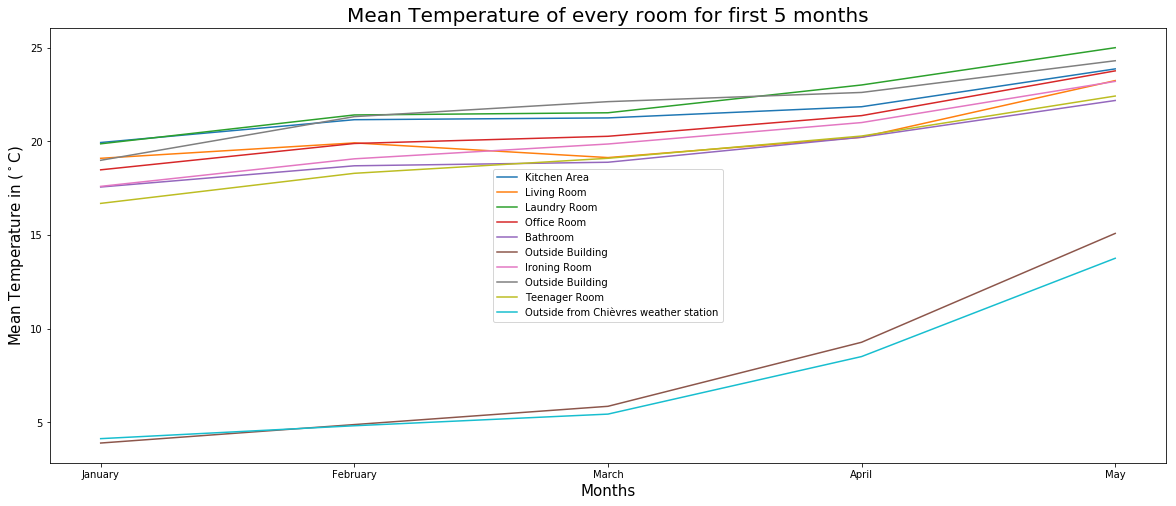

In [83]:
plt.rcParams['figure.figsize'] = (20, 8)

plt.plot(data['month_name'] , month_mean_T1 , label = 'Kitchen Area')
plt.plot(data['month_name'] , month_mean_T2 , label = 'Living Room')
plt.plot(data['month_name'] , month_mean_T3 , label = 'Laundry Room')
plt.plot(data['month_name'] , month_mean_T4 , label = 'Office Room')
plt.plot(data['month_name'] , month_mean_T5 , label = 'Bathroom')
plt.plot(data['month_name'] , month_mean_T6 , label = 'Outside Building')
plt.plot(data['month_name'] , month_mean_T7 , label = 'Ironing Room')
plt.plot(data['month_name'] , month_mean_T8 , label = 'Outside Building')
plt.plot(data['month_name'] , month_mean_T9 , label = 'Teenager Room')
plt.plot(data['month_name'] , month_mean_To , label = 'Outside from Chièvres weather station')

plt.xlabel("Months" , fontsize=15)
plt.ylabel("Mean Temperature in ($^\circ$C)" , fontsize=15)
plt.title("Mean Temperature of every room for first 5 months" , fontsize=20)
y = ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May']

plt.legend()
plt.show()

In [85]:
for mon in data.month_name:
    month_mean_RHo.append(data[data['month_name']==mon]['RH_out'].mean(axis=0))

In [87]:
data['month_mean_T1']=month_mean_T1
data['month_mean_T2']=month_mean_T2
data['month_mean_T3']=month_mean_T3
data['month_mean_T4']=month_mean_T4
data['month_mean_T5']=month_mean_T5
data['month_mean_T6']=month_mean_T6
data['month_mean_T7']=month_mean_T7
data['month_mean_T8']=month_mean_T8
data['month_mean_T9']=month_mean_T9
data['month_mean_To']=month_mean_To
data['month_mean_RH1']=month_mean_RH1
data['month_mean_RH2']=month_mean_RH2
data['month_mean_RH3']=month_mean_RH3
data['month_mean_RH4']=month_mean_RH4
data['month_mean_RH5']=month_mean_RH5
data['month_mean_RH6']=month_mean_RH6
data['month_mean_RH7']=month_mean_RH7
data['month_mean_RH8']=month_mean_RH8
data['month_mean_RH9']=month_mean_RH9
data['month_mean_RHo']=month_mean_RHo

In [88]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,month_mean_RH1,month_mean_RH2,month_mean_RH3,month_mean_RH4,month_mean_RH5,month_mean_RH6,month_mean_RH7,month_mean_RH8,month_mean_RH9,month_mean_RHo
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,42.28448,41.65607,42.680624,42.713621,54.121171,92.175166,39.168631,47.197645,44.437044,86.607461
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,42.28448,41.65607,42.680624,42.713621,54.121171,92.175166,39.168631,47.197645,44.437044,86.607461
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,42.28448,41.65607,42.680624,42.713621,54.121171,92.175166,39.168631,47.197645,44.437044,86.607461
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,42.28448,41.65607,42.680624,42.713621,54.121171,92.175166,39.168631,47.197645,44.437044,86.607461
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,42.28448,41.65607,42.680624,42.713621,54.121171,92.175166,39.168631,47.197645,44.437044,86.607461


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 58 columns):
date              19735 non-null datetime64[ns]
Appliances        19735 non-null int64
lights            19735 non-null int64
T1                19735 non-null float64
RH_1              19735 non-null float64
T2                19735 non-null float64
RH_2              19735 non-null float64
T3                19735 non-null float64
RH_3              19735 non-null float64
T4                19735 non-null float64
RH_4              19735 non-null float64
T5                19735 non-null float64
RH_5              19735 non-null float64
T6                19735 non-null float64
RH_6              19735 non-null float64
T7                19735 non-null float64
RH_7              19735 non-null float64
T8                19735 non-null float64
RH_8              19735 non-null float64
T9                19735 non-null float64
RH_9              19735 non-null float64
T_out             19735 non

In [90]:
data.to_csv('Data_analysed.csv')